# Exploratory analysis and Feature Engineering

Now that we have the data, let's take a look on it, clean it and create features for the machine learning model.
<br>
<h3>Goals:</h3> <br>
<b>1 - Understand the data we collected.</b> <br>
For this part, we will use pandas and matpyplot libs. <br>
<br>
<b>2 - Clean null values and irrelevant characters.</b> <br>
We will use apply with custom functions and RegEx.<br>
<br>
<b>3 - Transform the text data into features we can use.</b> <br>
We will create features and evaluate their correlation and importance (seaborn and  sklearn).<br>
<br>
<b>4 - Tolkenize data.</b><br>
TfidfVectorizer from sklearn.feature_extraction.text.<br>


In [2]:
from sklearn.preprocessing import normalize 

In [3]:
from sklearn.cluster import KMeans

In [4]:
# Importing the libraries

# Manipulating the data
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Data vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Saving the output
import datetime

<h4>Functions</h4>

In [5]:
# removes chars from a string, based on a list
def remove_char(text,list_of_chars):
    for char in list_of_chars:
        text = text.replace(char,'')
    return text

# if a text is duplicated in two columns, remove it from the one passed as first arg
def extract_href(x):
    if type(x[1]) != str:
        return x[0]
    else:
        return x[0].replace(x[1],'')
    
def specialCharCleaner(x):
        
    x = re.sub(r'[?|$|.|!]',r' ',str(x)) 
    x = re.sub(r'[^a-zA-Z0-9 ]',r' ',str(x))
    x = re.sub('  ',' ',str(x))
            
    return x

def remove_numbers(x):
    x =''.join(c if c not in map(str,range(0,10)) else '' for c in str(x)) #for remove numbers
    for i in range(3):
        x = re.sub('  ',' ',str(x)) # remove extra espaces
    return x

# concats multiple coluns
def connect_columns(x):
    return str(x[0]) + ' ' + str(x[1]) + ' ' + str(x[2]) + ' ' + str(x[3])

# Just to make the notebook more organized
def heat_map(df):
    corr = df.corr()
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )

We have two different sources of data, so let's load and put them all together in a single dataframe

In [6]:
# Importing inputs

df = pd.read_csv(r'C:\Users\ponde\Documents\programacao\Python\FreshJobs\validation\all_input_records.csv')

In [7]:
df.head()

,company,url,aTag,aTagText,aTagContent,href,keys,attributes,key_attr,trun_href,candidateMatch
0,later,https://later.com/careers/#positions,"<a href=""/"">\n<img class=""cP--nav__logoImage"" ...","<a href=""/"">\n<img class=""cP--nav__logoImage"" ...",\n\n,/,dict_keys(['href']),dict_values(['/']),{'href': '/'},/,0.0
1,later,https://later.com/careers/#positions,"<a class=""cP--nav__dropdownLink cta--signup u-...","<a class=""cP--nav__dropdownLink cta--signup u-...",Create account\n,https://www.later.com/#,"dict_keys(['class', 'href'])","dict_values([['cP--nav__dropdownLink', 'cta--s...","{'class': ['cP--nav__dropdownLink', 'cta--sign...",https://www.later.com/#,0.0
2,later,https://later.com/careers/#positions,"<a class=""cP--nav__dropdownLink cP--nav__signI...","<a class=""cP--nav__dropdownLink cP--nav__signI...",Sign In,https://app.later.com/,"dict_keys(['class', 'href'])","dict_values([['cP--nav__dropdownLink', 'cP--na...","{'class': ['cP--nav__dropdownLink', 'cP--nav__...",https://app.later.com/,0.0
3,later,https://later.com/careers/#positions,"<a href=""/schedule/"">Scheduling\n</a>","<a href=""/schedule/"">Scheduling\n</a>",Scheduling\n,/schedule/,dict_keys(['href']),dict_values(['/schedule/']),{'href': '/schedule/'},/schedule/,0.0
4,later,https://later.com/careers/#positions,"<a href=""/instagram-analytics/"">Instagram Anal...","<a href=""/instagram-analytics/"">Instagram Anal...",Instagram Analytics\n,/instagram-analytics/,dict_keys(['href']),dict_values(['/instagram-analytics/']),{'href': '/instagram-analytics/'},/instagram-analytics/,0.0


In [8]:
df.shape

(8817, 11)

In [9]:
df.columns

# company -> employer
# url -> url from the website the data was pulled from
# aTag -> entire tag 'a' that contains the link we want to evaluate
# aTagText -> same as above, but with a different approach to extract
# aTagContent -> the text that is displayed in the website (extracted from the tag 'a')
# href -> the link we want to evaluate (extracted from the tag 'a')
# keys -> all the keys of the element tag
# attributes -> all attributes associated with the keys from the tag
# key_attr -> keys and attributes, in a dict format
# trun_href -> the truncated href
# candidateMatch -> indicates if the link is a job posting or not - 0 or 1

Index(['company', 'url', 'aTag', 'aTagText', 'aTagContent', 'href', 'keys',
       'attributes', 'key_attr', 'trun_href', 'candidateMatch'],
      dtype='object')

In [10]:
# Everything was loaded as objects, if we get any trouble ahead we will handle this

df.dtypes

company            object
url                object
aTag               object
aTagText           object
aTagContent        object
href               object
keys               object
attributes         object
key_attr           object
trun_href          object
candidateMatch    float64
dtype: object

In [11]:
df.isna().sum()

company            0
url                0
aTag               0
aTagText           0
aTagContent       71
href               0
keys               0
attributes         0
key_attr           0
trun_href          0
candidateMatch     0
dtype: int64

<h4>We have a lot of null values for aTagContent and href. The first one should not be a problem for now. For the latter, it does not make sense to carry data that does not have a link, so let's drop those rows</h4>

In [12]:
row_drop = df[df.href.isna()].index
df.drop(row_drop,axis='rows',inplace=True)
df.reset_index(drop=True,inplace=True)

In [13]:
df.isna().sum()

company            0
url                0
aTag               0
aTagText           0
aTagContent       71
href               0
keys               0
attributes         0
key_attr           0
trun_href          0
candidateMatch     0
dtype: int64

<h4>Let's take a look on the distribution of data by company</h4>

Only 43% of the data is composed by real job posts. That is surprising, since all links were extracted from career webpages. Facebook represents half of the dataset, so we need to be careful not to create features that may overfit our model.

In [14]:
pd.crosstab(df['company'],df['candidateMatch'],margins=True,margins_name='Total',normalize=True).sort_values(by='Total', ascending=False)

candidateMatch,0.0,1.0,Total
company,,,
Total,0.453669,0.546331,1.000000
Facebook,0.096291,0.193263,0.289554
Oracle,0.031190,0.028241,0.059431
Okta,0.012249,0.046841,0.059090
doordash,0.006238,0.045821,0.052059
...,...,...,...
CIBC,0.000113,0.000000,0.000113
google,0.000113,0.000000,0.000113
GM,0.000113,0.000000,0.000113


Google, walmart, opentext, ecobee and rubikloud.ai have no job openings. Probably there was a problem while scraping those pages. 

In [15]:
# Creating a copy of df for backup purposes
df_backup = df.copy()

Let's save the dataframe to keep track of the data we are classifying

In [16]:
now = datetime.datetime.now()
today = datetime.datetime.today()

date = today.strftime("%Y-%m-%d")
hour = now.strftime("%H")
minute = now.strftime("%M")

stamp = str(date) + ' ' + str(hour) + 'h' + str(minute)

df_backup.to_csv(r'C:\Users\ponde\Documents\programacao\Python\FreshJobs\dataset_before_col_drop'+str(stamp)+'.csv',index=False)

'company' and 'url' should add no value for the model because they will not help in the classification. Also, 'aTag' and 'aTagtext' have all their data duplicated in other columns, such as keys and attributes.

In [17]:
df = df.drop(['company','url','aTag','aTagText'],axis='columns')

In [18]:
df.head()

,aTagContent,href,keys,attributes,key_attr,trun_href,candidateMatch
0,\n\n,/,dict_keys(['href']),dict_values(['/']),{'href': '/'},/,0.0
1,Create account\n,https://www.later.com/#,"dict_keys(['class', 'href'])","dict_values([['cP--nav__dropdownLink', 'cta--s...","{'class': ['cP--nav__dropdownLink', 'cta--sign...",https://www.later.com/#,0.0
2,Sign In,https://app.later.com/,"dict_keys(['class', 'href'])","dict_values([['cP--nav__dropdownLink', 'cP--na...","{'class': ['cP--nav__dropdownLink', 'cP--nav__...",https://app.later.com/,0.0
3,Scheduling\n,/schedule/,dict_keys(['href']),dict_values(['/schedule/']),{'href': '/schedule/'},/schedule/,0.0
4,Instagram Analytics\n,/instagram-analytics/,dict_keys(['href']),dict_values(['/instagram-analytics/']),{'href': '/instagram-analytics/'},/instagram-analytics/,0.0


There is a lot of data to be cleaned, so let's walk throught each column

# aTagContet

We are going to do three things here: <br>
1 - Create a length feature <br>
2 - Group the length

In [19]:
# Creating the length feature
df['len_aTagContent'] = df['aTagContent'].apply(lambda x: len(x) if type(x) == str else 0)

In [20]:
df.head()

,aTagContent,href,keys,attributes,key_attr,trun_href,candidateMatch,len_aTagContent
0,\n\n,/,dict_keys(['href']),dict_values(['/']),{'href': '/'},/,0.0,2
1,Create account\n,https://www.later.com/#,"dict_keys(['class', 'href'])","dict_values([['cP--nav__dropdownLink', 'cta--s...","{'class': ['cP--nav__dropdownLink', 'cta--sign...",https://www.later.com/#,0.0,15
2,Sign In,https://app.later.com/,"dict_keys(['class', 'href'])","dict_values([['cP--nav__dropdownLink', 'cP--na...","{'class': ['cP--nav__dropdownLink', 'cP--nav__...",https://app.later.com/,0.0,7
3,Scheduling\n,/schedule/,dict_keys(['href']),dict_values(['/schedule/']),{'href': '/schedule/'},/schedule/,0.0,11
4,Instagram Analytics\n,/instagram-analytics/,dict_keys(['href']),dict_values(['/instagram-analytics/']),{'href': '/instagram-analytics/'},/instagram-analytics/,0.0,20


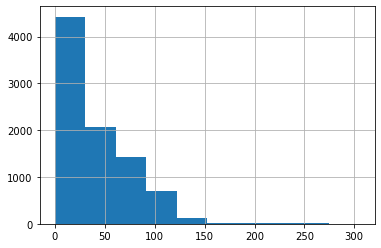

In [21]:
df.len_aTagContent.hist()

We can see that there are some outliers around 300. Also, we don't want the model to rely too much on this feature just because of its magnitude, so let's normalize it.

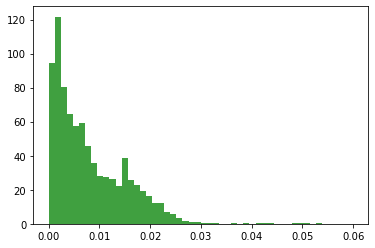

In [22]:
len_aTagContent_norm = normalize(df.len_aTagContent.values.reshape(1, -1))[0]
plt.hist(len_aTagContent_norm, 50, density=True, facecolor='g', alpha=0.75)
plt.show()

Simply applying the normalize function won't solve our problem, this method is sensitive to outliers. QualiteTransformer is a robust option for this.

In [23]:
from sklearn.preprocessing import QuantileTransformer

In [24]:
qt = QuantileTransformer(random_state=42)
len_aTagContent_qt = qt.fit_transform(df.len_aTagContent.values.reshape(-1, 1))

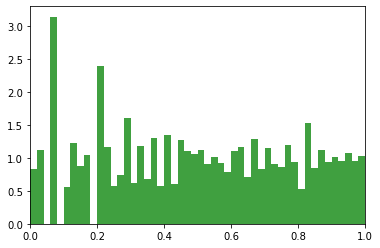

In [25]:
plt.hist(len_aTagContent_qt, 50,density=True, facecolor='g', alpha=0.75)
plt.xlim(0, 1)
plt.show()

The downside of using this method is that we will lose any information regarding the correlation between the distance of each point. If we think about the problem in hand, it is a fair assumption that this correlation should not be relevant. We will move forward using this strategy keeping in mind that there is a improvement opportunity here.

In [26]:
df['len_aTagContent_qt'] = len_aTagContent_qt

<Figure size 648x432 with 0 Axes>

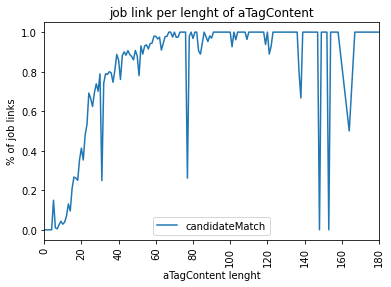

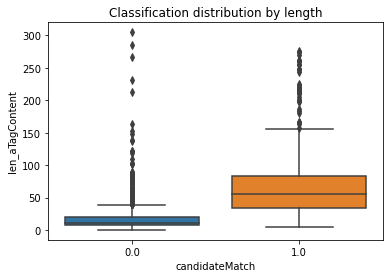

In [27]:
matches = df[['len_aTagContent','candidateMatch']].groupby('len_aTagContent').agg('mean')

# Ploting a line to check the correlation between the length of aTagContent and job links
plt.figure(figsize=(9,6))
matches.plot.line()
plt.xlim(0, 180)
plt.xticks(rotation=90)
plt.xlabel("aTagContent lenght")
plt.ylabel("% of job links")
plt.title("job link per lenght of aTagContent")
plt.show()

# Boxplot to check the distribution of job links per aTagContent length
ax = sns.boxplot(x='candidateMatch', y='len_aTagContent', data=df).set_title('Classification distribution by length')

Apparantly there is a good correlation between the length of aTagContent and candidateMatch. Since this correlation is not linear, let's create some groups of lengths. Let's also get the dummies for this new categorical feature.

In [28]:
df['len_aTagContent_group'] = np.where(df['len_aTagContent']<60,'under 60',
                                np.where(df['len_aTagContent']<=175,'between 60 and 175',
                                         'over 175'
                                         )
                                )

df = pd.get_dummies(df,columns=['len_aTagContent_group'])

In [29]:
df.head()

,aTagContent,href,keys,attributes,key_attr,trun_href,candidateMatch,len_aTagContent,len_aTagContent_qt,len_aTagContent_group_between 60 and 175,len_aTagContent_group_over 175,len_aTagContent_group_under 60
0,\n\n,/,dict_keys(['href']),dict_values(['/']),{'href': '/'},/,0.0,2,0.022523,0,0,1
1,Create account\n,https://www.later.com/#,"dict_keys(['class', 'href'])","dict_values([['cP--nav__dropdownLink', 'cta--s...","{'class': ['cP--nav__dropdownLink', 'cta--sign...",https://www.later.com/#,0.0,15,0.312312,0,0,1
2,Sign In,https://app.later.com/,"dict_keys(['class', 'href'])","dict_values([['cP--nav__dropdownLink', 'cP--na...","{'class': ['cP--nav__dropdownLink', 'cP--nav__...",https://app.later.com/,0.0,7,0.125626,0,0,1
3,Scheduling\n,/schedule/,dict_keys(['href']),dict_values(['/schedule/']),{'href': '/schedule/'},/schedule/,0.0,11,0.236236,0,0,1
4,Instagram Analytics\n,/instagram-analytics/,dict_keys(['href']),dict_values(['/instagram-analytics/']),{'href': '/instagram-analytics/'},/instagram-analytics/,0.0,20,0.374374,0,0,1


# href

In [30]:
# 1 - get len
# 2 - group len

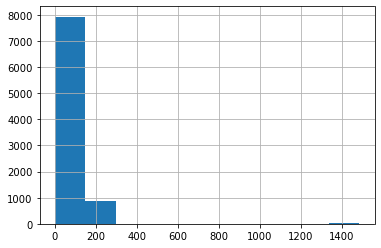

In [31]:
# Creating the len feature
df['len_href'] = df['href'].apply(lambda x: len(x) if type(x)==str else 0)

# ploting the hist for len_href

df['len_href'].hist()

Again we will need to normalize the data using a method that is not sensitive to outliers. But first last take a look to check if there is anything wrong with the dataset.

In [32]:
# let's check this 1400 char long href
print(len(df[df.len_href>1200].index))
df[df.len_href>1200]

14


,aTagContent,href,keys,attributes,key_attr,trun_href,candidateMatch,len_aTagContent,len_aTagContent_qt,len_aTagContent_group_between 60 and 175,len_aTagContent_group_over 175,len_aTagContent_group_under 60,len_href
4372,Next,/careers/jobs/?offices%5B0%5D=Altoona%2C+IA&of...,"dict_keys(['role', 'class', 'href', 'id'])","dict_values(['button', ['_42ft', '_3nu9', '_3n...","{'role': 'button', 'class': ['_42ft', '_3nu9',...",/careers/jobs/?offices%5B,0.0,4,0.034535,0,0,1,1484
4491,Prev,/careers/jobs/?offices%5B0%5D=Altoona%2C+IA&of...,"dict_keys(['role', 'class', 'href', 'id'])","dict_values(['button', ['_42ft', '_3nu9', '_3n...","{'role': 'button', 'class': ['_42ft', '_3nu9',...",/careers/jobs/?offices%5B,0.0,4,0.034535,0,0,1,1484
4492,Next,/careers/jobs/?offices%5B0%5D=Altoona%2C+IA&of...,"dict_keys(['role', 'class', 'href', 'id'])","dict_values(['button', ['_42ft', '_3nu9', '_3n...","{'role': 'button', 'class': ['_42ft', '_3nu9',...",/careers/jobs/?offices%5B,0.0,4,0.034535,0,0,1,1484
4597,Next,/careers/jobs/?offices%5B0%5D=Altoona%2C+IA&of...,"dict_keys(['role', 'class', 'href', 'id'])","dict_values(['button', ['_42ft', '_3nu9', '_3n...","{'role': 'button', 'class': ['_42ft', '_3nu9',...",/careers/jobs/?offices%5B,0.0,4,0.034535,0,0,1,1484
4693,Next,/careers/jobs/?offices%5B0%5D=Altoona%2C+IA&of...,"dict_keys(['role', 'class', 'href', 'id'])","dict_values(['button', ['_42ft', '_3nu9', '_3n...","{'role': 'button', 'class': ['_42ft', '_3nu9',...",/careers/jobs/?offices%5B,0.0,4,0.034535,0,0,1,1484
4773,Next,/careers/jobs/?offices%5B0%5D=Altoona%2C+IA&of...,"dict_keys(['role', 'class', 'href', 'id'])","dict_values(['button', ['_42ft', '_3nu9', '_3n...","{'role': 'button', 'class': ['_42ft', '_3nu9',...",/careers/jobs/?offices%5B,0.0,4,0.034535,0,0,1,1484
4871,Next,/careers/jobs/?offices%5B0%5D=Altoona%2C+IA&of...,"dict_keys(['role', 'class', 'href', 'id'])","dict_values(['button', ['_42ft', '_3nu9', '_3n...","{'role': 'button', 'class': ['_42ft', '_3nu9',...",/careers/jobs/?offices%5B,0.0,4,0.034535,0,0,1,1484
4940,Next,/careers/jobs/?offices%5B0%5D=Altoona%2C+IA&of...,"dict_keys(['role', 'class', 'href', 'id'])","dict_values(['button', ['_42ft', '_3nu9', '_3n...","{'role': 'button', 'class': ['_42ft', '_3nu9',...",/careers/jobs/?offices%5B,0.0,4,0.034535,0,0,1,1484
5017,Next,/careers/jobs/?offices%5B0%5D=Altoona%2C+IA&of...,"dict_keys(['role', 'class', 'href', 'id'])","dict_values(['button', ['_42ft', '_3nu9', '_3n...","{'role': 'button', 'class': ['_42ft', '_3nu9',...",/careers/jobs/?offices%5B,0.0,4,0.034535,0,0,1,1484
5121,Next,/careers/jobs/?offices%5B0%5D=Altoona%2C+IA&of...,"dict_keys(['role', 'class', 'href', 'id'])","dict_values(['button', ['_42ft', '_3nu9', '_3n...","{'role': 'button', 'class': ['_42ft', '_3nu9',...",/careers/jobs/?offices%5B,0.0,4,0.034535,0,0,1,1485


In [33]:
df['href'][4492]

'/careers/jobs/?offices%5B0%5D=Altoona%2C+IA&offices%5B1%5D=Ashburn%2C+VA&offices%5B2%5D=Atlanta%2C+GA&offices%5B3%5D=Austin%2C+TX&offices%5B4%5D=Boston%2C+MA&offices%5B5%5D=Chicago%2C+IL&offices%5B6%5D=Dallas%2C+TX&offices%5B7%5D=DeKalb%2C+IL&offices%5B8%5D=Denver%2C+CO&offices%5B9%5D=Detroit%2C+MI&offices%5B10%5D=Eagle+Mountain%2C+Utah&offices%5B11%5D=Forest+City%2C+NC&offices%5B12%5D=Fort+Worth%2C+TX&offices%5B13%5D=Fremont%2C+CA&offices%5B14%5D=Gallatin%2C+TN&offices%5B15%5D=Henrico%2C+VA&offices%5B16%5D=Huntsville%2C+AL&offices%5B17%5D=Los+Angeles%2C+CA&offices%5B18%5D=Los+Lunas%2C+NM&offices%5B19%5D=Menlo+Park%2C+CA&offices%5B20%5D=Miami%2C+Florida&offices%5B21%5D=Montreal%2C+Canada&offices%5B22%5D=Mountain+View%2C+CA&offices%5B23%5D=New+Albany%2C+OH&offices%5B24%5D=New+York%2C+NY&offices%5B25%5D=Newton+County%2C+GA&offices%5B26%5D=Northridge%2C+CA&offices%5B27%5D=Papillion%2C+NE&offices%5B28%5D=Pittsburgh%2C+PA&offices%5B29%5D=Prineville%2C+OR&offices%5B30%5D=Redmond%2C+WA&offic

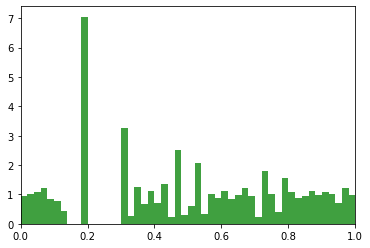

In [34]:
len_href_qt = qt.fit_transform(df.len_href.values.reshape(-1, 1))

plt.hist(len_href_qt, 50,density=True, facecolor='g', alpha=0.75)
plt.xlim(0, 1)
plt.show()

In [35]:
df['len_href_qt'] = len_href_qt

<Figure size 648x432 with 0 Axes>

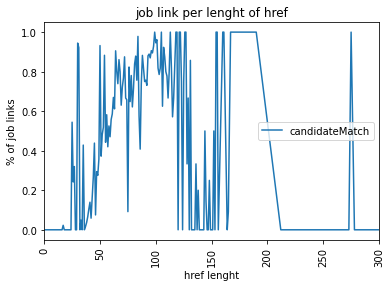

In [36]:
matches = df[['len_href','candidateMatch']].groupby('len_href').agg('mean')


plt.figure(figsize=(9,6))
matches.plot.line()
plt.xlim(0, 300)
plt.xticks(rotation=90)
plt.xlabel("href lenght")
plt.ylabel("% of job links")
plt.title("job link per lenght of href")
plt.show()

Text(0.5, 1.0, 'Boxplot len_href_qt')

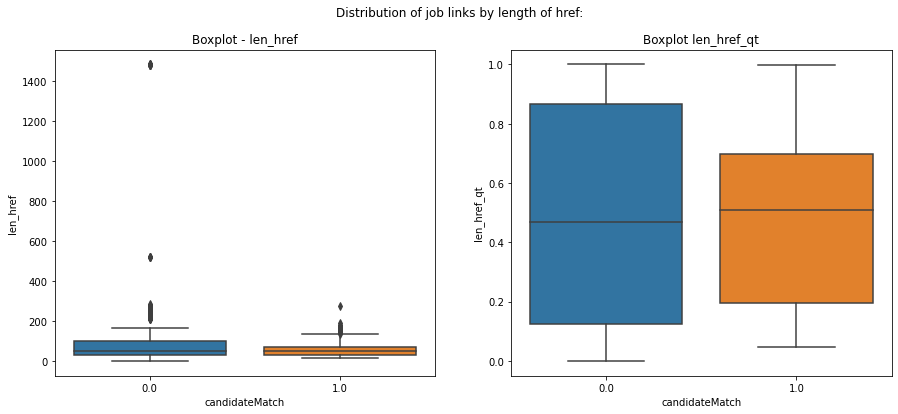

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

fig.suptitle('Distribution of job links by length of href:')

sns.boxplot(ax=axes[0], x='candidateMatch', y='len_href', data=df).set_title('Boxplot - len_href')

sns.boxplot(ax=axes[1], x='candidateMatch', y='len_href_qt', data=df).set_title('Boxplot len_href_qt')

Although there is a lot of overlap between the two classes, job links have a slightly larger hrefs. Let's separate them by groups to test if the correlation increases.

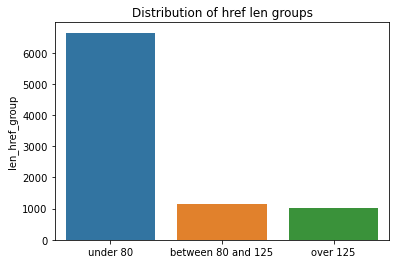

In [38]:
df['len_href_group'] = np.where(df['len_href']<80,'under 80',
                                np.where(df['len_href']<=125,'between 80 and 125',
                                         'over 125'
                                         )
                                )

# ploting the hist for len_href_group

cat_num = df['len_href_group'].value_counts()

ax = sns.barplot(x=cat_num.index,y=cat_num).set_title('Distribution of href len groups')


df = pd.get_dummies(df,columns=['len_href_group'])

# Keys

In [39]:
df['keys'].head()

0             dict_keys(['href'])
1    dict_keys(['class', 'href'])
2    dict_keys(['class', 'href'])
3             dict_keys(['href'])
4             dict_keys(['href'])
Name: keys, dtype: object

1 - get rid of the dict characters - keep only keys (do not split 2 word keys).<br>
2 - evaluate how many different keys we have. <br>
3 - check keys that have a higher candidateMatch rate (over the avg of dataset). <br>
4 - add a feature: number of keys.<br>

In [40]:
# For 1, we are going to use apply with a function we have declared earlier.

chars_to_remove = ['dict_keys','(',')','[',']',',',"'"]
df['keys'] = df['keys'].apply(remove_char,list_of_chars=chars_to_remove)
df['keys'].head()

0          href
1    class href
2    class href
3          href
4          href
Name: keys, dtype: object

In [41]:
# checking the most frequent keys in the dataset.
keys = df['keys'].str.split(expand=True).stack().value_counts()
keys[:10]

href              8817
class             5474
target            2237
style             1736
title              943
rel                914
id                 912
data-lynx-mode     741
aria-label         652
role               447
dtype: int64

As expected, href will be present in every row, since we dropped the few lines that hadn't this value. Now we need to evaluate if there is a correlation between these keys and candidateMatch.

In [42]:
perc_match = []
keys_check = []

# For every key term, we will check keys in the dataset and calculate how often they are related to a job link.
for key in keys.index:
    positive = 0
    frequency = 0
    for i in range(len(df.index)):
        
        if key in df['keys'][i]:
            frequency += 1            
            if df['candidateMatch'][i]==1:
                positive += 1
    perc_match.append(positive/frequency)
    keys_check.append(key)

df_keys = pd.DataFrame(columns=['keys','perc_match','above_avg_match'])

# Calculating the percentege of job links in the dataset
candidateMatch_frequency = (df['candidateMatch'].sum() / len(df.index))

df_keys['keys'] = keys_check
df_keys['perc_match'] = perc_match

# comparing the key frequency in job links vs the avg job link % in the dataset
df_keys['above_avg_match'] = np.where(df_keys['perc_match']>candidateMatch_frequency,1,0)

df_keys[['keys','perc_match']].sort_values(by='perc_match',ascending=False)[0:20]

,keys,perc_match
21,data-ph-at-job-location-area-text,1.000000
26,data-ph-at-job-id-text,1.000000
19,data-ph-at-job-post-date-text,1.000000
20,data-ph-at-job-category-text,1.000000
44,"""",1.000000
22,data-ph-at-job-location-text,1.000000
24,ph-click-ctx,1.000000
25,data-ph-at-job-type-text,1.000000
27,ph-tag,1.000000
17,data-access-list-item,1.000000


Let's check how these keys are distributed among companies.

In [43]:
df_backup[df_backup['keys'].str.contains('style')]['company'].value_counts().head()

Facebook                              1704
TD Bank Group                            6
later                                    3
ABB Inc.                                 3
Canada Life Assurance Company, The       2
Name: company, dtype: int64

In [44]:
df_backup[df_backup['keys'].str.contains('hreflang')]['company'].value_counts().head()

Okta    416
Name: company, dtype: int64

The most relevant keys are associated with basically one company, so we should not add this as a feature. Instead, there is a chance the word 'job' will be relevant, since it has a great correlation.

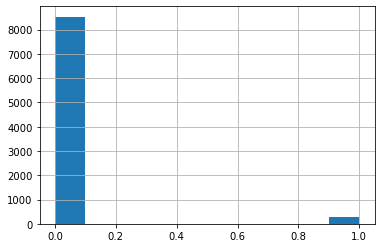

In [45]:
df['keys_low'] = df['keys'].apply(lambda x: x.lower())

df['key_job_yn'] = np.where(df['keys'].str.contains('job'),1,0)

df.drop('keys_low',axis='columns',inplace=True)

df['key_job_yn'].hist()

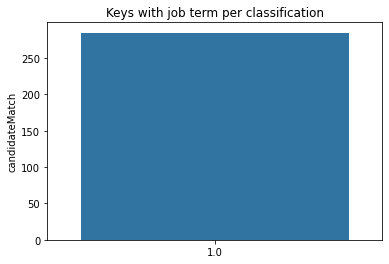

In [46]:
# ploting the hist for len_href_group

cat_num = df[df['key_job_yn']==1]['candidateMatch'].value_counts()

ax = sns.barplot(x=cat_num.index,y=cat_num).set_title('Keys with job term per classification')

It is not present in many rows, but let's keep this column for now since it always indicates job links. We will handle it later.

We can also add a 'number of keys' feature

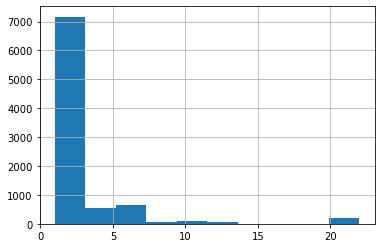

In [47]:
df['num_keys'] = df['keys'].apply(lambda x: len(x.split()))


df['num_keys'].hist()

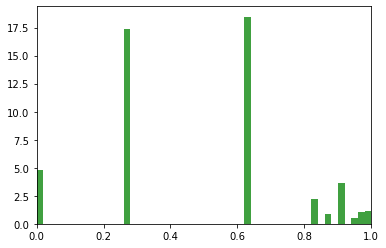

In [48]:
num_keys_qt = qt.fit_transform(df.num_keys.values.reshape(-1, 1))

df['num_keys_qt'] = len_href_qt

plt.hist(num_keys_qt, 50,density=True, facecolor='g', alpha=0.75)
plt.xlim(0, 1)
plt.show()

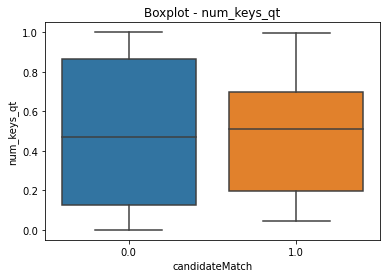

In [49]:
ax = sns.boxplot(x='candidateMatch', y='num_keys_qt', data=df).set_title('Boxplot - num_keys_qt')

# Attributes

In [50]:
df['attributes'].head()

0                                   dict_values(['/'])
1    dict_values([['cP--nav__dropdownLink', 'cta--s...
2    dict_values([['cP--nav__dropdownLink', 'cP--na...
3                          dict_values(['/schedule/'])
4               dict_values(['/instagram-analytics/'])
Name: attributes, dtype: object

1 - The href is repeated in every single line, we should get rid of it.<br>
2 - use a similar approach we used for keys.<br>

In [51]:
# using a custom function to remove the href from the attributes
df['attributes'] = df[['attributes','href']].apply(extract_href,axis=1)

# expliciting the characters we want to remove at this point (we don't want to break single attr in different words yet)
chars_to_remove = ['dict_values','(',')','[',']',',',"'"]

# removing thee special chras using a custom function
df['attributes'] = df['attributes'].apply(remove_char,list_of_chars=chars_to_remove)

df['attributes'].head()

0                                                  
1    cP--nav__dropdownLink cta--signup u--text--hl 
2            cP--nav__dropdownLink cP--nav__signIn 
3                                                  
4                                                  
Name: attributes, dtype: object

In [52]:
attrs = df['attributes'].str.split(expand=True).stack().value_counts()
len(attrs)

3816

In [53]:
# Since we have too many attrs, let's only check the relevance of the top 100 more frequent

attrs = df['attributes'].str.split(expand=True).stack().value_counts()[:100]

perc_match = []
attrs_check = []

for attr in attrs.index:
    positive = 0
    frequency = 0
    for i in range(len(df.index)):
        
        if attr in df['attributes'][i]:
            frequency += 1            
            if df['candidateMatch'][i]==1:
                positive += 1
    perc_match.append(positive/frequency)
    attrs_check.append(attr)

df_attrs = pd.DataFrame(columns=['attrs','perc_match','above_avg_match'])

candidateMatch_frequency = (df['candidateMatch'].sum() / len(df.index))

df_attrs['attrs'] = attrs_check
df_attrs['perc_match'] = perc_match
df_attrs['above_avg_match'] = np.where(df_attrs['perc_match']>candidateMatch_frequency,1,0)

df_attrs[['attrs','perc_match']].sort_values(by='perc_match',ascending=False)[0:20]

,attrs,perc_match
26,eachJob,1.0
17,Ontario,1.0
1,_8sef,1.0
67,posting:,1.0
45,lever-job-title,1.0
89,job-title-link,1.0
71,font_bold,1.0
72,job_link,1.0
35,390,1.0
34,ph-default-1562241208820-ph-search-results-v25...,1.0


Again, let's check how these attributes are distributed among companies.

In [54]:
df_backup[df_backup['attributes'].str.contains('jobTitle-link')]['company'].value_counts()

scotiabank                    200
Deloitte                      191
opentext                      124
Rogers Communications Inc.     74
Bell Canada                    35
Bank of Canada                 20
Hatch Ltd.                     12
ArcelorMittal Dofasco G.P.      7
Danone Canada                   6
Volvo                           4
Name: company, dtype: int64

In [55]:
df_backup[df_backup['attributes'].str.contains('linkEle')]['company'].value_counts()

Royal Bank of Canada    135
Snowflake                38
Mars Inc.                15
yelp                     10
Name: company, dtype: int64

Again, there is a high chance of overfiting the model, let's add a "job" feature instead.

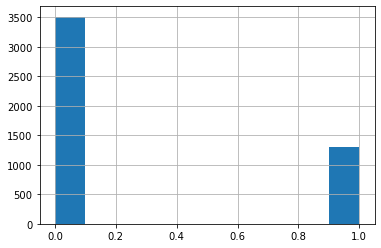

In [56]:
df['attr_low'] = df['attributes'].apply(lambda x: x.lower())

df['attr_job_yn'] = np.where(df['attr_low'].str.contains('job'),1,0)

df.drop('attr_low',axis='columns',inplace=True)

df[df.candidateMatch==1]['attr_job_yn'].hist()

In [57]:
df_backup[(df_backup.candidateMatch==1)&(df_backup['attributes'].str.contains('job'))]['company'].value_counts()

Facebook                                             1704
doordash                                              404
Oracle                                                249
scotiabank                                            200
Deloitte                                              191
Royal Bank of Canada                                  135
opentext                                              124
shopify                                                75
Rogers Communications Inc.                             74
TD Bank Group                                          71
klick                                                  70
Citi Canada                                            61
Ernest & young                                         53
glu                                                    52
Cisco                                                  51
loblawdigital                                          47
northone                                               43
Snowflake     

# key_attr

This column will be a copy of the previous two. Since we are focusing in simplicity here, we will not check the relevance between key and attr.

In [58]:
df = df.drop('key_attr',axis='columns')

# trun_href

This is a "incomplete" version of href.

In [59]:
df = df.drop('trun_href',axis='columns')

# Advanced feature engineering

We have two goals here <br> 
1 - Evaluate the correlation and relevance of the features we have. <br>
2 - Create a tolkenizer to extract the maximum value of text based features.

In [60]:
# removing the remaining special characteres that were kept to avoid breaking keys and attrs

df['aTagContent'] = df['aTagContent'].apply(specialCharCleaner)
df['href'] = df['href'].apply(specialCharCleaner)
df['keys'] = df['keys'].apply(specialCharCleaner)
df['attributes'] = df['attributes'].apply(specialCharCleaner)

Creating a cluster using all text

In [61]:
df['all_text'] = df[['aTagContent', 'href', 'keys', 'attributes']].apply(connect_columns,axis=1)
df['all_text'] = df['all_text'].apply(remove_numbers)

In [62]:
vectorizer = TfidfVectorizer(stop_words='english', max_features = 2000)
X = vectorizer.fit_transform(df['all_text'])

# getting the shape of X
print("Shape of X :", X.shape)

Shape of X : (8817, 2000)


In [63]:
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=10, n_init=1)

In [81]:
df['cluster'] = model.labels_

In [66]:
df_backup['cluster'] = df.cluster

In [80]:
print("Top terms per cluster:")

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :5]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 www
 square
 smartrecruiters
 com
 https
Cluster 1:
 com
 https
 pio
 lynx
 hover
Cluster 2:
 sef
 decoration
 style
 text
 careers
Cluster 3:
 button
 doordash
 dujcnx
 epullk
 sc
Cluster 4:
 fabout
 fnews
 safe
 fcoronavirus
 helping
Cluster 5:
 remote
 eligible
 hreflang
 company
 en
Cluster 6:
 lever
 submit
 btn
 apply
 jobs
Cluster 7:
 ph
 data
 job
 id
 text
Cluster 8:
 href
 link
 job
 com
 class
Cluster 9:
 jobdetail
 tzname
 gmt
 fnew
 tz


In [71]:
# checking % of job links per cluster

pd.crosstab(df_backup.cluster,df_backup.candidateMatch,normalize='index')

candidateMatch,0.0,1.0
cluster,,
0,0.373134,0.626866
1,1.000000,0.000000
2,0.001757,0.998243
3,0.385084,0.614916
4,1.000000,0.000000
5,0.009780,0.990220
6,0.225694,0.774306
7,0.437500,0.562500
8,0.660076,0.339924


In [64]:
df = pd.get_dummies(df,columns=['cluster'])

In [65]:
df.columns

Index(['aTagContent', 'href', 'keys', 'attributes', 'candidateMatch',
       'len_aTagContent', 'len_aTagContent_qt',
       'len_aTagContent_group_between 60 and 175',
       'len_aTagContent_group_over 175', 'len_aTagContent_group_under 60',
       'len_href', 'len_href_qt', 'len_href_group_between 80 and 125',
       'len_href_group_over 125', 'len_href_group_under 80', 'key_job_yn',
       'num_keys', 'num_keys_qt', 'attr_job_yn', 'all_text', 'cluster_0',
       'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5',
       'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9'],
      dtype='object')

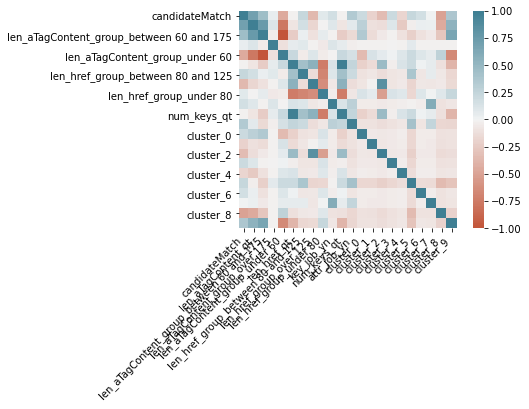

In [66]:
heat_map(df[['candidateMatch',
       'len_aTagContent_qt', 'len_aTagContent_group_between 60 and 175',
       'len_aTagContent_group_over 175', 'len_aTagContent_group_under 60',
       'len_href_qt', 'len_href_group_between 80 and 125',
       'len_href_group_over 125', 'len_href_group_under 80', 'key_job_yn',
       'num_keys_qt', 'attr_job_yn','cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4',
       'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9']])

Although we already have a good POV of the most relevant features, let's try a different approach. We are going to create a random feature, run a simple model and check which features can be discarted.

In [67]:
np.random.seed(42)

# Creating a column with random values
df['random_feature'] = np.random.rand(len(df.index))

y = df['candidateMatch']
X = df[['len_aTagContent_qt', 'len_aTagContent_group_between 60 and 175',
       'len_aTagContent_group_over 175', 'len_aTagContent_group_under 60',
       'len_href_qt', 'len_href_group_between 80 and 125',
       'len_href_group_over 125', 'len_href_group_under 80', 'key_job_yn',
       'num_keys_qt', 'attr_job_yn', 'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4',
       'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9',
        'random_feature']]


# We are going to use the random forest to take advantage of the feature importances.
rfc = RandomForestClassifier(max_depth=8,n_estimators=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rfc.fit(X_train,y_train)

prediction = rfc.predict(X_test)

print('Accuracy Score:  ', accuracy_score(prediction,y_test))

importances = rfc.feature_importances_

df_importances = pd.DataFrame({'feature':X.columns, 'importance':importances})

print(df_importances.sort_values(by='importance',ascending=False))

Accuracy Score:   0.9686318972033258
                                     feature  importance
0                         len_aTagContent_qt    0.262564
9                                num_keys_qt    0.114429
19                                 cluster_8    0.108609
4                                len_href_qt    0.104601
3             len_aTagContent_group_under 60    0.077905
1   len_aTagContent_group_between 60 and 175    0.059914
10                               attr_job_yn    0.059271
6                    len_href_group_over 125    0.035099
16                                 cluster_5    0.031577
13                                 cluster_2    0.024638
20                                 cluster_9    0.023051
12                                 cluster_1    0.016309
17                                 cluster_6    0.014404
14                                 cluster_3    0.013804
5          len_href_group_between 80 and 125    0.013801
15                                 cluster_4    0.0

First, we got a really good accuracy, even before creating more advanced features or tunning the hyperparameters. Second, there are clearly some features adding no value to the model, since their importance was lower than the random feature we created, let's drop them.

In [68]:
drop_features = []

for i in range(len(df_importances.index)):
    if df_importances['importance'][i] <= df_importances[df_importances.feature == 'random_feature']['importance'].values[0]:
        drop_features.append(df_importances['feature'][i])

df = df.drop(drop_features,axis='columns')

In [69]:
df.head()

,aTagContent,href,keys,attributes,candidateMatch,len_aTagContent,len_aTagContent_qt,len_aTagContent_group_between 60 and 175,len_aTagContent_group_under 60,len_href,...,all_text,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,,,href,,0.0,2,0.022523,0,1,1,...,href,0,0,0,0,0,0,0,1,0
1,Create account,https www later com,class href,cP nav dropdownLink cta signup u text hl,0.0,15,0.312312,0,1,23,...,Create account https www later com class href ...,0,0,0,0,0,0,0,1,0
2,Sign In,https app later com,class href,cP nav dropdownLink cP nav signIn,0.0,7,0.125626,0,1,22,...,Sign In https app later com class href cP nav ...,0,0,0,0,0,0,0,1,0
3,Scheduling,schedule,href,,0.0,11,0.236236,0,1,10,...,Scheduling schedule href,0,0,0,0,1,0,0,0,0
4,Instagram Analytics,instagram analytics,href,,0.0,20,0.374374,0,1,21,...,Instagram Analytics instagram analytics href,1,0,0,0,0,0,0,0,0


We still need to handle the first 4 columns, which are categorical. Let's put them all together so we can <b>create tolkens</b>.

In [70]:
# checking if we got everything write
print(df[df.all_text.isna()][['all_text','aTagContent', 'href', 'keys', 'attributes']].head())

Empty DataFrame
Columns: [all_text, aTagContent, href, keys, attributes]
Index: []


In [71]:
# We can now drop those columns
df.drop(['aTagContent', 'href', 'keys', 'attributes'],axis='columns',inplace=True)

In [72]:
# and these too
df.drop(['len_aTagContent', 'len_href', 'num_keys'],axis='columns',inplace=True)

In [73]:
df.head()

,candidateMatch,len_aTagContent_qt,len_aTagContent_group_between 60 and 175,len_aTagContent_group_under 60,len_href_qt,len_href_group_between 80 and 125,len_href_group_over 125,len_href_group_under 80,key_job_yn,num_keys_qt,...,all_text,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,0.0,0.022523,0,1,0.000000,0,0,1,0,0.000000,...,href,0,0,0,0,0,0,0,1,0
1,0.0,0.312312,0,1,0.087087,0,0,1,0,0.087087,...,Create account https www later com class href ...,0,0,0,0,0,0,0,1,0
2,0.0,0.125626,0,1,0.077578,0,0,1,0,0.077578,...,Sign In https app later com class href cP nav ...,0,0,0,0,0,0,0,1,0
3,0.0,0.236236,0,1,0.020521,0,0,1,0,0.020521,...,Scheduling schedule href,0,0,0,0,1,0,0,0,0
4,0.0,0.374374,0,1,0.067568,0,0,1,0,0.067568,...,Instagram Analytics instagram analytics href,1,0,0,0,0,0,0,0,0


In [74]:
# Let's save a version of this dataframe without tolkens so we can run more simple models.

now = datetime.datetime.now()
today = datetime.datetime.today()

date = today.strftime("%Y-%m-%d")
hour = now.strftime("%H")
minute = now.strftime("%M")

stamp = str(date) + ' ' + str(hour) + 'h' + str(minute)

df.to_csv(r'C:\Users\ponde\Documents\programacao\Python\FreshJobs\ '+str(stamp)+' dataset_pre_tolken.csv', index=False)

In [76]:
import pickle

In [77]:
filename = r'C:\Users\ponde\Documents\FreshJobs\cluster '+str(stamp)' .sav'
pickle.dump(model, open(filename, 'wb'))